In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing  import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold



In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler


In [3]:
def Fisher_Linear_Classification_Model(train_x, train_y, test_x, test_y):
    sklearn_lda = lda(n_components=1)
    sklearn_lda.fit_transform(train_x,train_y)
    return sklearn_lda.score(train_x, train_y), sklearn_lda.score(test_x, test_y)

In [4]:
def Perceptron_Model(train_x, train_y, test_x, test_y):
    sklearn_perceptron = Perceptron()
    sklearn_perceptron.fit(train_x,train_y)
    return sklearn_perceptron.score(train_x, train_y), sklearn_perceptron.score(test_x, test_y)

In [5]:
def Naive_Bayes_Model(train_x, train_y, test_x, test_y):
    skllearn_naive_model = GaussianNB()
    skllearn_naive_model.fit(train_x,train_y)
    return skllearn_naive_model.score(train_x, train_y), skllearn_naive_model.score(test_x, test_y)

In [6]:
def Logistic_Regression_Model(train_x, train_y, test_x, test_y):
    sklearn_logistic_regression = LogisticRegression(random_state=0)
    sklearn_logistic_regression.fit(train_x,train_y)
    return sklearn_logistic_regression.score(train_x, train_y), sklearn_logistic_regression.score(test_x, test_y)

In [7]:
def Artificial_Neural_Networks_Model(train_x, train_y, test_x, test_y):
    sklearn_ANN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
    sklearn_ANN.fit(train_x,train_y)
    return sklearn_ANN.score(train_x, train_y),sklearn_ANN.score(test_x, test_y)

In [8]:
def Support_Vector_Machine_Model(train_x, train_y, test_x, test_y):
    sklearn_SVM = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
    sklearn_SVM.fit(train_x,train_y)
    return sklearn_SVM.score(train_x, train_y), sklearn_SVM.score(test_x, test_y)

In [13]:
dataset = pd.read_csv('dataset_comb.csv')
kf = KFold(n_splits=7, shuffle= True)
dataset = dataset.drop(['id'], axis = 1)
data_test = []
data_train = []
for i in range(6):
    data_test.append([])
    data_train.append([])
for train_index, test_index in kf.split(dataset):
    train = dataset.drop(test_index)
    test = dataset.drop(train_index)
    train_x = train.drop(['Class'], axis=1)
    train_y = train['Class']
    test_x = test.drop(['Class'], axis=1)
    test_y = test['Class']
    print(Artificial_Neural_Networks_Model(train_x, train_y, test_x, test_y))
    
    options = [Fisher_Linear_Classification_Model, Perceptron_Model, Naive_Bayes_Model, Logistic_Regression_Model, Artificial_Neural_Networks_Model, Support_Vector_Machine_Model]
#     for index, i in enumerate(options):
#         # print(i(train_x, train_y, test_x, test_y))
#         train, test = i(train_x, train_y, test_x, test_y)
#         data_test[index].append(test)
#         data_train[index].append(train)

/home/trinadh/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


(0.9881952909475845, 0.985373364126251)
(0.9869763264258677, 0.9876828329484219)


/home/trinadh/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


(0.9881311349201257, 0.9861431870669746)
(0.9881311349201257, 0.9884526558891455)
(0.9872329505357028, 0.9865280985373364)


/home/trinadh/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


(0.9875537306729967, 0.9896073903002309)
(0.9867847061842443, 0.9884482094724683)


In [10]:
labels = ['Fisher','Perceptron','NB','Log Regr','ANN','SVM']
print("Training Data Accuracy")
for i in range(len(labels)):
    print(labels[i],"  ", sum(data_train[i])/len(data_train[i]))
print("\n")
print("Testing Data Accuracy")
for i in range(len(labels)):
    print(labels[i],"  ", sum(data_test[i])/len(data_test[i]))
print("\n")


Training Data Accuracy
Fisher    0.9867656521098477
Perceptron    0.9400511700234141
NB    0.976959035601534
Log Regr    0.9891119067549773
ANN    0.9876638300266922
SVM    0.9898634458511145


Testing Data Accuracy
Fisher    0.9866924677405059
Perceptron    0.940116845901723
NB    0.9769042742810663
Log Regr    0.9891120171355582
ANN    0.9874623542014678
SVM    0.9896619330114719




Training Data Accuracy
Fisher    0.9867931463742637
Perceptron    0.8259481635384764
NB    0.9769865304539119
Log Regr    0.9887453067634011
ANN    0.9876454920896307
SVM    0.9898359433552348


Testing Data Accuracy
Fisher    0.9865274209881284
Perceptron    0.8241842593377184
NB    0.9770691728195545
Log Regr    0.988781944804216
ANN    0.9875172145139001
SVM    0.9897717806768132

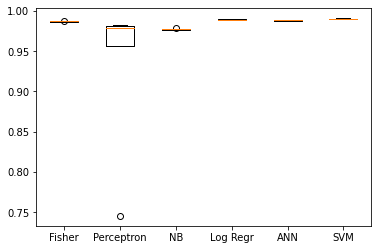

In [11]:

fig, ax = plt.subplots()
ax.boxplot(data_train)
ax.set_xticklabels(labels)
plt.savefig('train.png')
plt.show()
# show plot

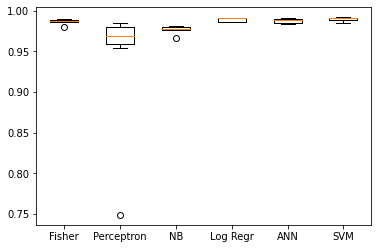

In [12]:
fig, ax = plt.subplots()
ax.boxplot(data_test)
ax.set_xticklabels(labels)
plt.savefig('test.png')
plt.show()